In [606]:

import random
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import numpy as np
pd.options.display.max_colwidth = 1000
pd.options.mode.chained_assignment = None


##### Load Data

In [607]:
df = pd.read_excel('../data_processed/women_ordinary_people.xlsx')

In [608]:
df.head()

,text,name,created_at,gender,ethnic,label,sentiment,sentiment_score
0,malala banning girl school taliban also arresting champions education matiullahwesa founded penpath pro,AfgEducation,2023-03-29,female,hazara,1,neutral,0.000000
1,since days afghan girl education centers closed afghanistan quality education power transform societies single generation afghan girl women need quality education need support help formal education let afghan girl learn,AfgEducation,2023-03-29,female,hazara,1,negative,-0.085714
2,core problem afghanistan conflicts lack education also core solution afghanistan conflicts education afghan girl women also part afg need edu right edu working alternative way facilitate education afghan girl women,AfgEducation,2023-03-28,female,hazara,1,positive,0.285714
3,matiullahwesa voice afghan generation peaceful education activist want education afghanistan also obligation rise voice afghan girl women education afghanistan relaesematiullahwesa let afghan girl learn,AfgEducation,2023-03-28,female,hazara,1,positive,0.250000
4,enemy ignorance work education afghans solution afghanistans miseries education educate encourage afghans study work educate afghans let afghan girl learn,AfgEducation,2023-03-28,female,hazara,1,neutral,0.000000


##### Drop Null, Empty and NaN valeus

In [609]:
df.dropna(subset=['text'], inplace=True) # remove nan values
df.drop_duplicates(subset=['text'], inplace=True) # remove duplicates


##### Clean Data

In [610]:
df['text'] = df['text'].str.replace('&amp;', ' ')
def clean_tweet_text(text):
    # Check for null or NaN values
    if pd.isnull(text):
        return text
    # Remove URL
    text = re.sub(r'http\S+', '', text)
    
    # Remove RT (retweet) tag
    text = text.replace('RT', '')
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters and punctuations, and add a space after removing them
    text = re.sub(r'[^\w\s]', '', text)

    # Remove hashtags
    text = re.sub(r'#(\w+)', '', str(text))
    # Remove extra spaces
    text = ' '.join(text.split())
    
    # Convert to lowercase
    text = text.lower()
    
    return text
# Apply the cleaning function to 'text' column
df['text'] = df['text'].apply(clean_tweet_text)


In [611]:
# df = pd.read_excel('../data_processed/men_ordinary_people.xlsx')

In [612]:
df[['text']].sample(5)

,text
26095,sharifanayebi fathers become confused maybe solve problem speed future generation help hard work success caravan like new children
22372,mahdimoradi work many followers stop hazara genocide
19408,ibrahimreporter naseeb khan haqqani day came board raised opposition national flag pak mirwais ashraf competence
25560,sajadzafari responsible want power make swami vivekananda
53802,babasafdari dear birar thank always active reason support nothing special stop hazara genocide


##### Remove Text Less then 30 characters

In [613]:
df = df[df['text'].str.len() >=30]

##### Remove Empty Rows

In [614]:
def remove_empty_rows(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Remove rows with empty values in the column
        df = df[df[column].notna() & df[column].astype(str).str.strip().ne('')]
    return df

df = remove_empty_rows(df)


##### Remove All Null Values

In [615]:
def remove_null_columns(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Check if the column contains any null values
        if df[column].isnull().any():
            # If any null value exists, drop the column
            df = df.drop(column, axis=1)
    return df
df = remove_null_columns(df)


##### Remove Stopwords

In [616]:
from nltk.corpus import stopwords
import nltk

def remove_stopwords(df):
    stop_words = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return df

df = remove_stopwords(df)


##### Convert Timezone

In [617]:
# df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce').dt.date.astype(str)

In [618]:
df.sample(4)

,text,name,created_at,gender,ethnic,label,sentiment,sentiment_score
5138,aliakbar shahbz knew hot woman would set fire freedom likes antiwomen used act peoples demands suffering people eyes oppressed women means beat womans life freedom know woman less right life freedom animal tweets,Gordafariid,2023-02-13,female,tajik,1,positive,0.123016
38230,build boat get away strange land,nabizada2_sahar,2022-10-15,female,tajik,0,negative,-0.050000
52052,end war abd alrahman executed hundreds hazara reciters daily women children sold market among cooperated abd alrahmans army turning antihazara culture throughout afghanistan every family stop hazara genocide,Rahmmat_H,2023-02-05,female,hazara,1,neutral,0.000000
1611,tanzeela queenay prkhh ghzl samra sahar tana sweetie jamili come long time,AyeeshaSediqi,2023-03-19,female,pashtun,0,negative,-0.050000


In [619]:
df.sample(4)

,text,name,created_at,gender,ethnic,label,sentiment,sentiment_score
35711,dont give according michael jordan give becomes habit give fight goals know sometimes patience needed stand women afghanistan let afghan girl learn,mar_yamtrahomi,2022-04-23,female,tajik,1,neutral,0.0
14802,rabiarezai secrecy disrespect learned kind conscience,AmiriWahida,2022-11-17,female,tajik,0,positive,0.6
1305,zizikhanoum please pay attention afghanistan crime hazara crime tajik crime resistance crime panjshir,AmiriMarooo,2022-10-03,female,tajik,0,neutral,0.0
18598,arefyaqubi bigoted lapoks international airline shame journalistic dignity dozen traitor generation mujahideen thieves shame generation landghar mujahid thieves,DarmalHeela,2023-02-11,female,pashtun,0,neutral,0.0


##### Convert Timezone to datetime

In [620]:
df.head()

,text,name,created_at,gender,ethnic,label,sentiment,sentiment_score
0,malala banning girl school taliban also arresting champions education matiullahwesa founded penpath pro,AfgEducation,2023-03-29,female,hazara,1,neutral,0.000000
1,since days afghan girl education centers closed afghanistan quality education power transform societies single generation afghan girl women need quality education need support help formal education let afghan girl learn,AfgEducation,2023-03-29,female,hazara,1,negative,-0.085714
2,core problem afghanistan conflicts lack education also core solution afghanistan conflicts education afghan girl women also part afg need edu right edu working alternative way facilitate education afghan girl women,AfgEducation,2023-03-28,female,hazara,1,positive,0.285714
3,matiullahwesa voice afghan generation peaceful education activist want education afghanistan also obligation rise voice afghan girl women education afghanistan relaesematiullahwesa let afghan girl learn,AfgEducation,2023-03-28,female,hazara,1,positive,0.250000
4,enemy ignorance work education afghans solution afghanistans miseries education educate encourage afghans study work educate afghans let afghan girl learn,AfgEducation,2023-03-28,female,hazara,1,neutral,0.000000


##### Drop the whole rows which is >=2020

In [621]:
df["created_at"] = pd.to_datetime(df["created_at"], format="%Y-%m-%d")
filtered_df = df[df["created_at"].dt.year >= 2020]
df.drop(df[df["created_at"].dt.year <= 2020].index, inplace=True)

##### Remove Great March, 30

In [622]:
df.shape

(57688, 8)

In [623]:
df.sample(4)

,text,name,created_at,gender,ethnic,label,sentiment,sentiment_score
47479,say guest dont wear tikre guest says tekre insulted country dont wear sake women shames double escaped dog busy office kabul covered oppressed women die prosecutors office,TheLostJalalzai,2023-01-21,female,pashtun,1,positive,0.050000
5036,ferani way said exactly give girl thank god dont daughter seen complex person still knows girl less boy even though envelope tweet clear said,Gordafariid,2023-02-15,female,tajik,1,negative,-0.029167
17195,islamyarzadran haqqanis suicide punjabis,DarmalHeela,2023-05-14,female,pashtun,0,neutral,0.000000
40753,abdulba papi gaks iran pakistan west go read mr zaifs book ahmad shah masood atta mazari slave thats says things,RanaA8989,2022-12-27,female,tajik,0,neutral,0.000000


##### Check How Many accounts are there

In [624]:
len(df['name'].unique())

54

##### Labeling Process

In [625]:
def label_tweets(text):
    keywords = ['education', 'school', 'university', 'women', 'girl']
    for keyword in keywords:
        if keyword in text.lower():
            return 1
    return 0
df = df.copy()
df['label'] = df['text'].apply(label_tweets)

##### Sentiment Analysis

In [626]:
x = df['text']
sentiment_labels = []
sentiment_scores = []
for tweet in x:
    # Create a TextBlob object
    blob = TextBlob(tweet)
    # Get the sentiment polarity (-1 to 1)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    sentiment_labels.append(sentiment)
    sentiment_scores.append(polarity)
# Add the sentiment labels and scores as new columns in the DataFrame
df['sentiment'] = sentiment_labels
df['sentiment_score'] = sentiment_scores

##### Data Set Summary

In [627]:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Counts:\n", sentiment_counts)
total_counts = sentiment_counts['positive'] + sentiment_counts['negative']
print("Total Counts:", total_counts)

Sentiment Counts:
 sentiment
neutral     24221
positive    21488
negative    11979
Name: count, dtype: int64
Total Counts: 33467


##### Calculate positive tweets and percentage for women, single user

In [628]:
women_positive_count = df[(df['gender'] == 'female') & (df['sentiment'] == 'positive')].shape[0]
women_total_count = df[df['gender'] == 'female'].shape[0]
women_positive_percentage = (women_positive_count / women_total_count) * 100
# Print the results
print("Positive tweets from men:", women_positive_count, "(", women_positive_percentage, "%)")

Positive tweets from men: 21488 ( 37.24864789904313 %)


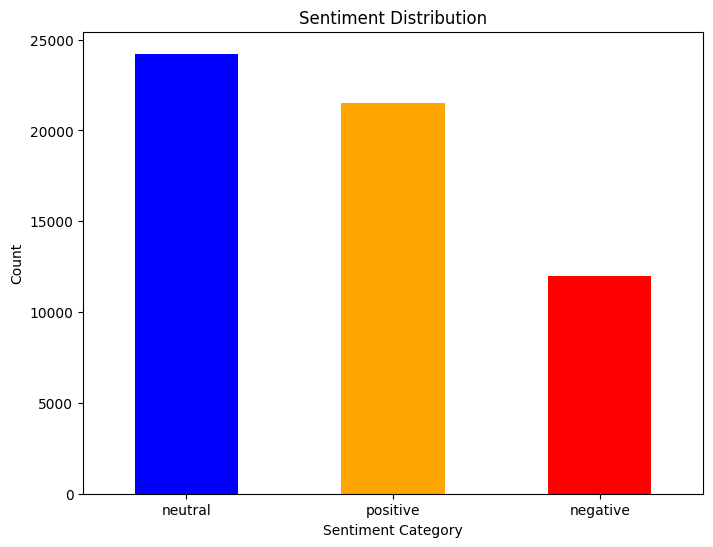

Sentiment Distribution: 33467


In [629]:
# Define custom colors for sentiment categories
colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'orange'}

# Calculate sentiment counts
sentiment_counts = df['sentiment'].value_counts()

# Plot the sentiment counts with custom colors
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=[colors.get(x, 'gray') for x in sentiment_counts.index])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Sentiment Distribution')
plt.show()

# Calculate total counts
total_counts = sentiment_counts['positive'] + sentiment_counts['negative']
print("Sentiment Distribution:", total_counts)


##### Content Analysis

In [630]:
df_edu = df.loc[df['label'] == 1]
print("Number of tweets in favor of education: ", len(df_edu))

Number of tweets in favor of education:  9727


##### Code Schema

In [631]:
coding_scheme = {
'women': ['women', 'woman', 'female', 'feminine', 'girl', 'lady'],
'education': ['education', 'educational', 'learning', 'academics', 'knowledge'],
'school': ['school', 'classroom', 'teacher', 'students', 'curriculum'],
'university': ['university', 'college', 'higher education', 'academia', 'campus'],
'access': ['access', 'opportunity', 'enrollment', 'attendance', 'entry'],
'quality': ['quality', 'standard', 'curriculum', 'teaching', 'learning'],
'benefits': ['benefit', 'advantage', 'improvement', 'progress'],
'barriers': ['barrier', 'restriction', 'obstacle', 'challenge', 'difficulty'],
'empowerment': ['empower', 'empowering', 'confidence', 'self-esteem', 'agency'],
'gender': ['gender', 'discriminatioan', 'inequality', 'feminism', 'patriarchy']
}

# Define a function to apply the coding scheme to each tweet
def apply_coding_scheme(text):
    codes = []
    for code, keywords in coding_scheme.items():
        for keyword in keywords:
            if keyword in text.lower():
                codes.append(code)
    return codes

# Apply the coding scheme to the text column and create a new column for the codes
df_edu['codes'] = df_edu['text'].apply(apply_coding_scheme)

In [632]:
df_edu[['text','sentiment','sentiment_score','gender','label','codes']].sample(5)

,text,sentiment,sentiment_score,gender,label,codes
15001,abbaszeineddin panjshir people massacred protesting girl raised voice justice hashtag taken panjshabar,neutral,0.000000,female,1,[women]
10627,repgracemeng niceworkers voteshekar grace meng funding corrupt ngo stole afghan women,negative,-0.500000,female,1,[women]
8357,royasaberzada australia first country remain silent oppression taliban showed support afghan women boycotting taliban cricket team women never support team ignores social problems women ban taliban cricket team,positive,0.094444,female,1,[women]
31891,kaiseraz children died attack girl school sep stop hazara genocide,neutral,0.000000,female,1,"[women, school]"
43924,wahidkochayy pashtun girlwoman pashtun tribe question asked,neutral,0.000000,female,1,"[women, women]"


##### Visualization

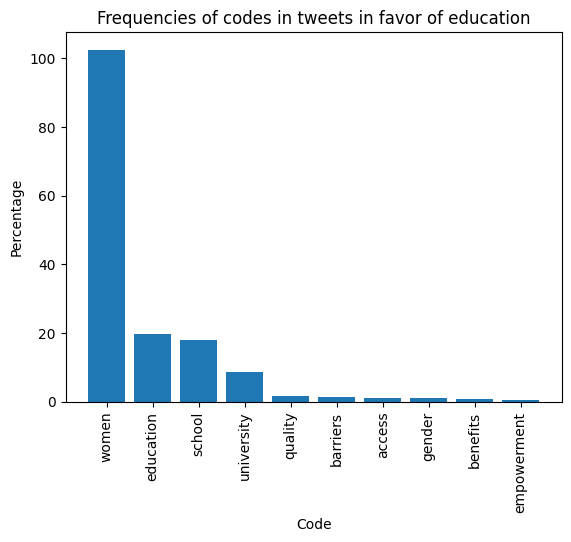

In [633]:
df_codes = df_edu.explode('codes')
# Calculate the frequency and percentage of each code
code_freq = df_codes['codes'].value_counts()
code_perc = code_freq / len(df_edu) * 100
# Plot the code frequencies as a bar chart
plt.bar(code_perc.index, code_perc.values)
plt.title('Frequencies of codes in tweets in favor of education')
plt.xlabel('Code')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

In [634]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Loop through each keyword and calculate the sentiment of tweets containing that keyword
for keyword in ['women', 'education', 'school', 'university', 'girl']:
    keyword_tweets = df_edu[df_edu['text'].str.contains(keyword)].copy()
    keyword_tweets.loc[:, 'sentiment_score'] = keyword_tweets['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    print(f"Sentiment analysis of tweets containing the keyword '{keyword}':")
    print(keyword_tweets.groupby('sentiment')['text'].count())


Sentiment analysis of tweets containing the keyword 'women':
sentiment
negative    1100
neutral     2146
positive    2408
Name: text, dtype: int64
Sentiment analysis of tweets containing the keyword 'education':
sentiment
negative    316
neutral     527
positive    798
Name: text, dtype: int64
Sentiment analysis of tweets containing the keyword 'school':
sentiment
negative    348
neutral     449
positive    549
Name: text, dtype: int64
Sentiment analysis of tweets containing the keyword 'university':
sentiment
negative    188
neutral     263
positive    307
Name: text, dtype: int64
Sentiment analysis of tweets containing the keyword 'girl':
sentiment
negative     726
neutral     1240
positive    1332
Name: text, dtype: int64


In [635]:
for keyword in ['women education']:
    keyword_tweets = df_edu[df_edu['text'].str.contains(keyword)].copy()
    keyword_tweets.loc[:, 'sentiment_score'] = keyword_tweets['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    print(f"Sentiment analysis of tweets containing the keyword '{keyword}':")
    print(keyword_tweets.groupby('sentiment')['text'].count())

Sentiment analysis of tweets containing the keyword 'women education':
sentiment
negative    10
neutral     23
positive    27
Name: text, dtype: int64


In [636]:
for keyword in ['women education']:
    keyword_tweets = df_edu[df_edu['text'].str.contains(keyword)].copy()
    keyword_tweets.loc[:, 'sentiment_score'] = keyword_tweets['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
    sentiment_counts = keyword_tweets.groupby('sentiment')['text'].count()
    total_count = sentiment_counts.sum()
    sentiment_percentages = (sentiment_counts / total_count) * 100
    result = sentiment_counts.astype(str) + ' (' + sentiment_percentages.round(1).astype(str) + '%)'
    print(f"Sentiment analysis of tweets containing the keyword '{keyword}':")
    print(result)


Sentiment analysis of tweets containing the keyword 'women education':
sentiment
negative    10 (16.7%)
neutral     23 (38.3%)
positive    27 (45.0%)
Name: text, dtype: object


##### Average sentiment

In [637]:
import random
from textblob import TextBlob
keywords = ['women education']
all_tweets = [row['text'] for _, row in df.iterrows() if any(keyword in row['text'] for keyword in keywords)]
sample_tweets = random.sample(all_tweets, k=min(10, len(all_tweets)))
mean_sentiment = sum(TextBlob(tweet).sentiment.polarity for tweet in all_tweets) / len(all_tweets) if all_tweets else 0
print(f"Average sentiment score for all tweets: {mean_sentiment}")


Average sentiment score for all tweets: 0.04169113756613756


##### Sentiment Category

In [638]:
import numpy as np
category_sentiment = df_edu.groupby(df_edu['codes'].apply(tuple))['text'].apply(lambda x: np.mean([TextBlob(tweet).sentiment.polarity for tweet in x]))
print("Sentiment Scores by Category:")
category_sentiment.head()

Sentiment Scores by Category:


codes
(education,)              0.030180
(education, access)      -0.006429
(education, barriers)    -0.032927
(education, benefits)    -0.031393
(education, education)    0.093032
Name: text, dtype: float64

##### Calculate the sentiment scores for all tweets

In [639]:
sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in df['text']]
# Compare the sentiment distributions using a t-test
t_stat, p_value = stats.ttest_1samp(sentiment_scores, 0)
print("Comparison of Sentiment Women Ordinary People:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Comparison of Sentiment Men:
T-statistic: 54.53734918247717
P-value: 0.0


In [640]:
men_education_tweets = df[df['text'].str.contains('women education', case=False)]
sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in men_education_tweets['text']]
t_stat, p_value = stats.ttest_1samp(sentiment_scores, 0)
print("Comparison of Sentiment for Women Education Tweets:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Comparison of Sentiment for Women Education Tweets:
T-statistic: 1.5827050792224808
P-value: 0.11883500035121558


#### Calculate the sentiment scores for tweets containing each keyword

In [641]:
keyword_sentiment = {}
for keyword in keywords:
    keyword_tweets = df_edu[df_edu['text'].str.contains(keyword)]
    sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in keyword_tweets['text']]
    keyword_sentiment[keyword] = np.mean(sentiment_scores)
print("Sentiment Scores by Keyword:")
for keyword, sentiment_score in keyword_sentiment.items():
    print(f"{keyword}: {sentiment_score}")


Sentiment Scores by Keyword:
women education: 0.04169113756613758


##### Chi-square test of independence

In [642]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'], df['label'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square Test of Independence:")
print("Chi-square:", chi2)
print("P-value:", p_value)

Chi-square Test of Independence:
Chi-square: 0.0
P-value: 1.0


##### Create a cross-tabulation between sentiment and gender

In [643]:
cross_tab = pd.crosstab(df['sentiment'], df['gender'])
# Print the cross-tabulation
print("Cross-Tabulation of Sentiment and Gender:")
print(cross_tab)

Cross-Tabulation of Sentiment and Gender:
gender     female
sentiment        
negative    11979
neutral     24221
positive    21488


In [644]:
cross_tab = pd.crosstab(df['gender'], df['label'])
# Print the cross-tabulation
print("Cross-Tabulation of Gender and Label:")
print(cross_tab)

Cross-Tabulation of Gender and Label:
label       0     1
gender             
female  47961  9727


##### Calculate descriptive statistics for women


In [645]:
men_sentiment_scores = [TextBlob(tweet).sentiment.polarity for tweet in df[df['gender'] == 'female']['text']]
# Calculate descriptive statistics for men
men_mean_sentiment = np.mean(men_sentiment_scores)
men_median_sentiment = np.median(men_sentiment_scores)
men_std_sentiment = np.std(men_sentiment_scores)
men_quartiles_sentiment = np.percentile(men_sentiment_scores, [25, 50, 75])

print("Descriptive Statistics for men ordinary people:")
print("Mean Sentiment:", men_mean_sentiment)
print("Median Sentiment:", men_median_sentiment)
print("Standard Deviation of Sentiment:", men_std_sentiment)
print("Quartiles of Sentiment:", men_quartiles_sentiment)

Descriptive Statistics for men ordinary people:
Mean Sentiment: 0.06375562621593164
Median Sentiment: 0.0
Standard Deviation of Sentiment: 0.28077825322328437
Quartiles of Sentiment: [0.         0.         0.16666667]


##### Frequent Words

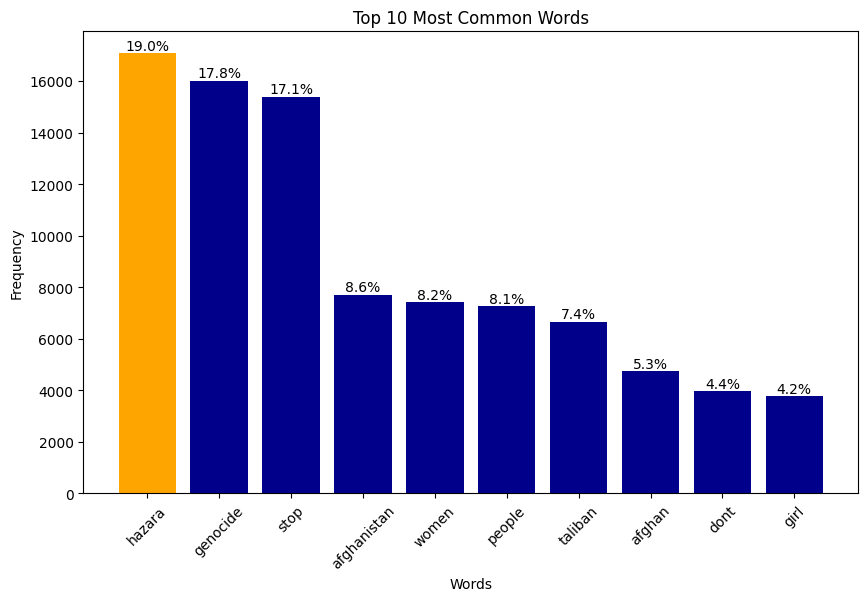

In [646]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all the text into a single string
all_text = ' '.join(df['text'].tolist())

# Split the text into individual words
all_words = all_text.split()

# Count the occurrences of each word
word_counts = Counter(all_words)

# Retrieve the most common words
most_common_words = word_counts.most_common(10)

# Extract the words and their frequencies
words = [word for word, count in most_common_words]
frequencies = [count for word, count in most_common_words]

# Calculate the total frequency of all words
total_frequency = sum(frequencies)

# Calculate the percentages
percentages = [count / total_frequency * 100 for count in frequencies]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart for the most common words
bars = ax.bar(words, frequencies, color=['orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'])

# Add labels and title
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Most Common Words')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add percentage labels above each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Show the chart
plt.show()


##### Time Series

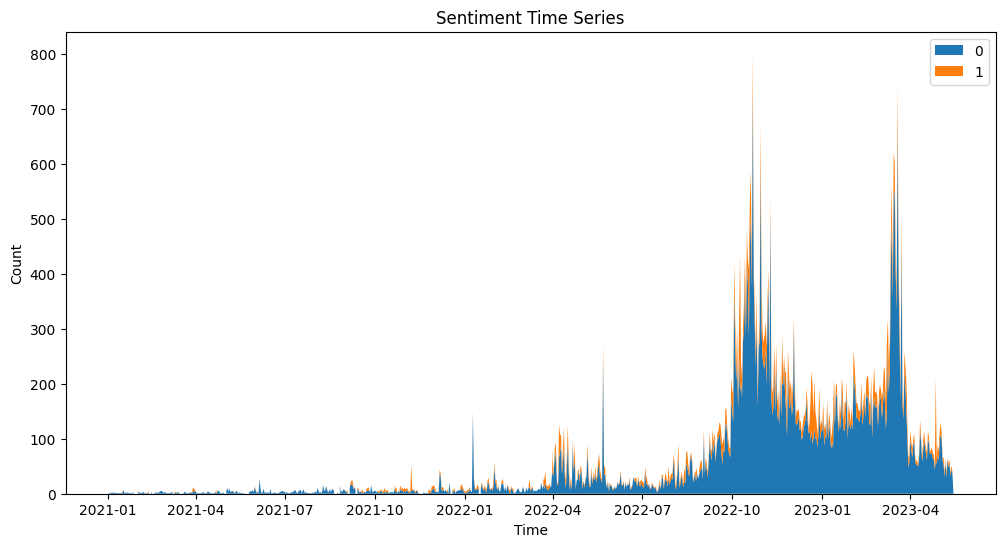

In [647]:

sentiment_counts = df.groupby(['created_at', 'label']).size().unstack()
# Extract the time periods and convert them to datetime objects
time_periods = pd.to_datetime(sentiment_counts.index)
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the stacked area plot for sentiment categories
ax.stackplot(time_periods, sentiment_counts.T, labels=sentiment_counts.columns)
# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Sentiment Time Series')
# Add legend
ax.legend()
# Show the chart
plt.show()

##### Frequent Tweet

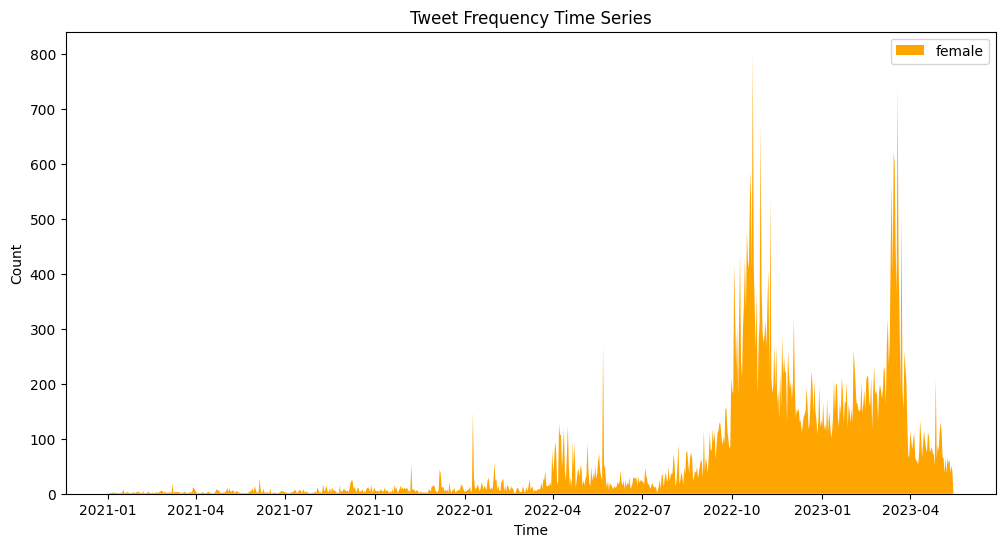

In [648]:
# Group the data by 'created_at' and 'gender', and count the number of tweets for each gender
freq_counts = df.groupby(['created_at', 'gender']).size().unstack()

# Extract the time periods and convert them to datetime objects
time_periods = pd.to_datetime(freq_counts.index)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked area plot for genders
ax.stackplot(time_periods, freq_counts.T, labels=freq_counts.columns, colors=['orange', 'darkblue'])

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.set_title('Tweet Frequency Time Series')

# Add legend
ax.legend()

# Show the chart
plt.show()


In [649]:
df[['text']].sample(7)

,text
39250,ukinafghanistan number working
5937,aaallleeeffff wasnt without reason wish good luck
6737,proud woman know children noncaliphate consider shame honor world women day sudabeh
5310,milad r trowels become job take pictures people subway alleys streets airports write pictures twitter
3096,ayeeshasediqi lets proud lets lucky intention marry someone else ayeeshasediqi
21892,leader taj saram baba stop hazara genocide
25821,mothmarymah historically politically disenfranchised systematically discriminated culturally distinct millennials still victims murders head


In [650]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce').dt.date.astype(str)

In [651]:
df.sample(5)

,text,name,created_at,gender,ethnic,label,sentiment,sentiment_score
11661,battle bases genghis khans sects established rashiduddin hafez abro jozjani prove neither genghis khan military commanders issued settlement order current areas hazara jat khanov p stop hazara genocide,agaarozo,2022-10-30,female,tajik,0,negative,-0.050000
46529,isnt dress isnt nation isnt story society full pain sadness words express made people illiterate poor miserable name people flag name jihad name taliban insulted oppressed money,TheLostJalalzai,2023-03-23,female,pashtun,0,negative,-0.350000
1849,brother khan reached followers congratulations may always go higher,AyeeshaSediqi,2023-02-28,female,pashtun,0,positive,0.250000
23012,regarding prohibition women education sound stone spiritual mother kind speak ashrafghani,Frah_Frah1,2022-12-24,female,tajik,1,positive,0.333333
42738,samistanekzai seriously mentally ill,rangeeza,2023-03-01,female,tajik,0,negative,-0.500000


In [653]:
df.shape

(57688, 8)

In [652]:
df.to_excel('../data_processed/women_ordinary_people.xlsx',index=False)